In [1]:
#Leemos los datos del catalogo de ultravista
dat <- read.table('catalog.dat',na.strings='---')
dat <- dat[,-c(1,2,3)]

names <-  c('ra','dec','Xpos','Ypos','F','E(B-V)', 'Yap2','e_Yap2','Yap7','e_Yap7','Ymag','e_Ymag','Yr','Ysf','Jap2','e_Jap2','Jap7','e_Jap7','Jmag','e_Jmag','Jr','Jsf','Hap2','e_Hap2','Hap7','e_Hap7','Hmag','e_Hmag','Hr','Hsf','Kap2','e_Kap2','Kap7','e_Kap7','Kmag','e_Kmag','Kr','Ksf','Nap2','e_Nap2','Nap7','e_Nap7','Nmag','e_Nmag','Nr','Nsf')      
colnames(dat) <- names

In [2]:
dat <- na.omit(dat) #Sacamos las filas que no tienen alguna observacion

#Desenrojecemos
Av <- 3.1*dat$'E(B-V)'
dat$Y <- dat$Yap2-0.39*Av
dat$J <- dat$Jap2-0.28*Av
dat$H <- dat$Hap2-0.184*Av
dat$K <- dat$Kap2-0.118*Av

#Calculamos los colores
dat$'Y-J' <- dat$Y-dat$J
dat$'H-K' <- dat$H-dat$K

In [3]:
summary(dat)

       ra             dec             Xpos            Ypos      
 Min.   :149.3   Min.   :1.589   Min.   : 6394   Min.   : 7157  
 1st Qu.:149.7   1st Qu.:1.954   1st Qu.:16847   1st Qu.:15914  
 Median :150.0   Median :2.242   Median :24527   Median :22831  
 Mean   :150.0   Mean   :2.228   Mean   :25058   Mean   :22500  
 3rd Qu.:150.4   3rd Qu.:2.509   3rd Qu.:32846   3rd Qu.:29242  
 Max.   :150.8   Max.   :2.828   Max.   :42669   Max.   :36893  
     F               E(B-V)             Yap2           e_Yap2        
 Mode :logical   Min.   :0.01579   Min.   :12.40   Min.   : 0.00000  
 FALSE:160920    1st Qu.:0.01822   1st Qu.:22.37   1st Qu.: 0.01000  
 TRUE :4517      Median :0.01921   Median :23.42   Median : 0.02600  
 NA's :0         Mean   :0.01916   Mean   :23.14   Mean   : 0.04957  
                 3rd Qu.:0.02015   3rd Qu.:24.20   3rd Qu.: 0.05350  
                 Max.   :0.02352   Max.   :32.29   Max.   :83.17100  
      Yap7           e_Yap7               Ymag         

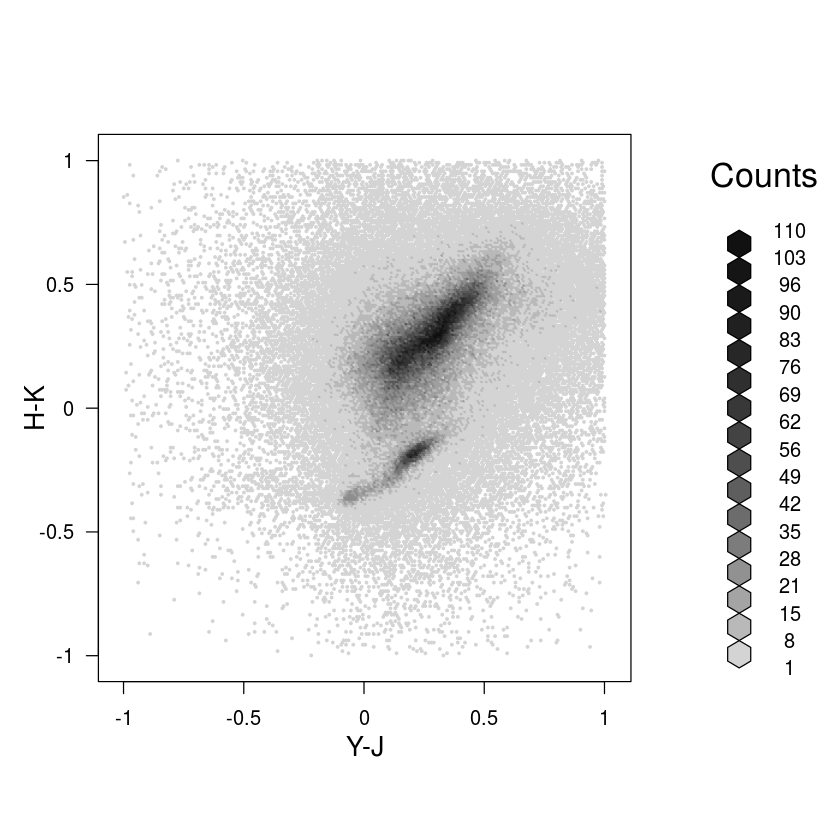

In [4]:
library('hexbin')
colores <- subset(dat, dat$'Y-J' > -1 & 
           dat$'Y-J' < 1 & dat$'H-K' > -1 & 
           dat$'H-K' < 1)

plot(hexbin(colores$'Y-J',colores$'H-K',xbins=200), xlab = 'Y-J', ylab = 'H-K')

## Veamos que onda un clustering

In [10]:
library('mclust')

ind <- sample(1:length(dat$Y), size = 10000) #Hago un sampleo random por q sino no me da la ram
aux <- dat[ind,]
aux <- subset(aux, select = c('Y-J', 'H-K')) #Pruebo solo con los colores
mc <- Mclust(aux, G = 1:3)

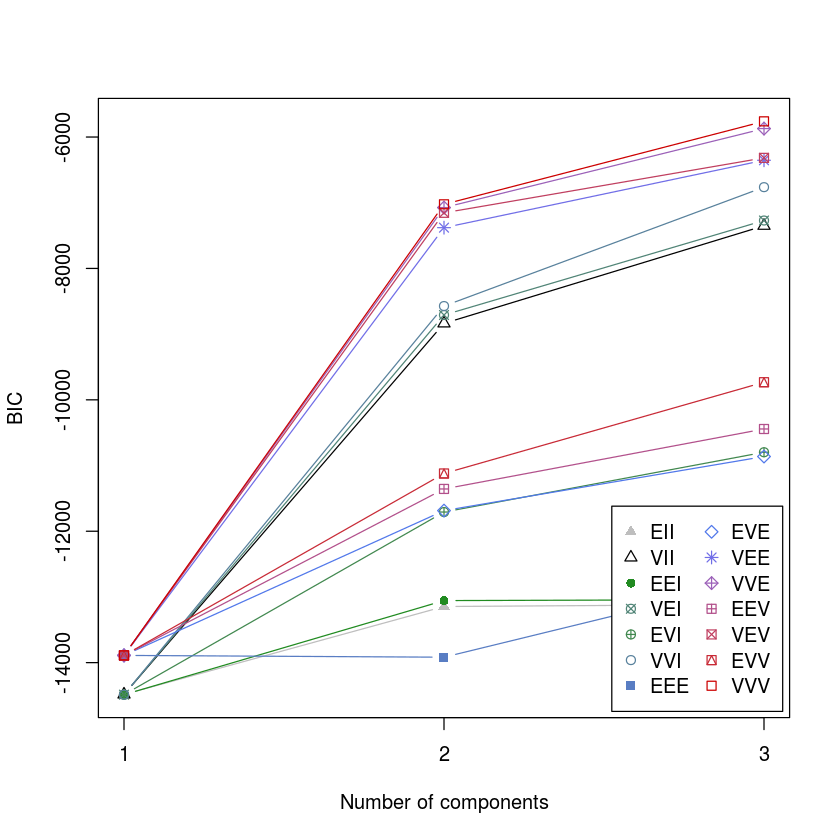

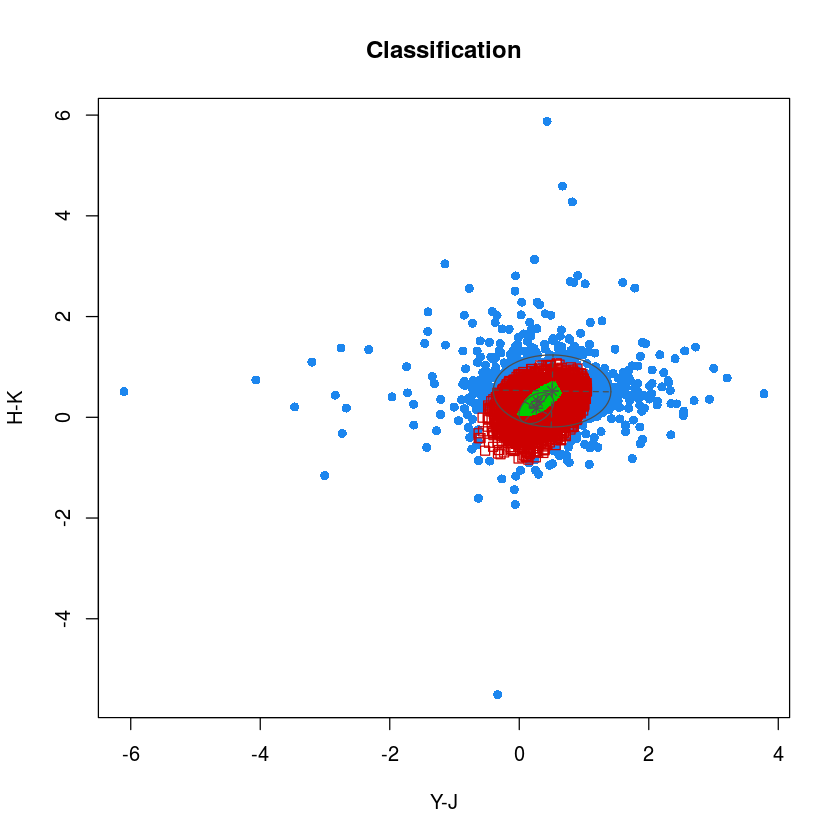

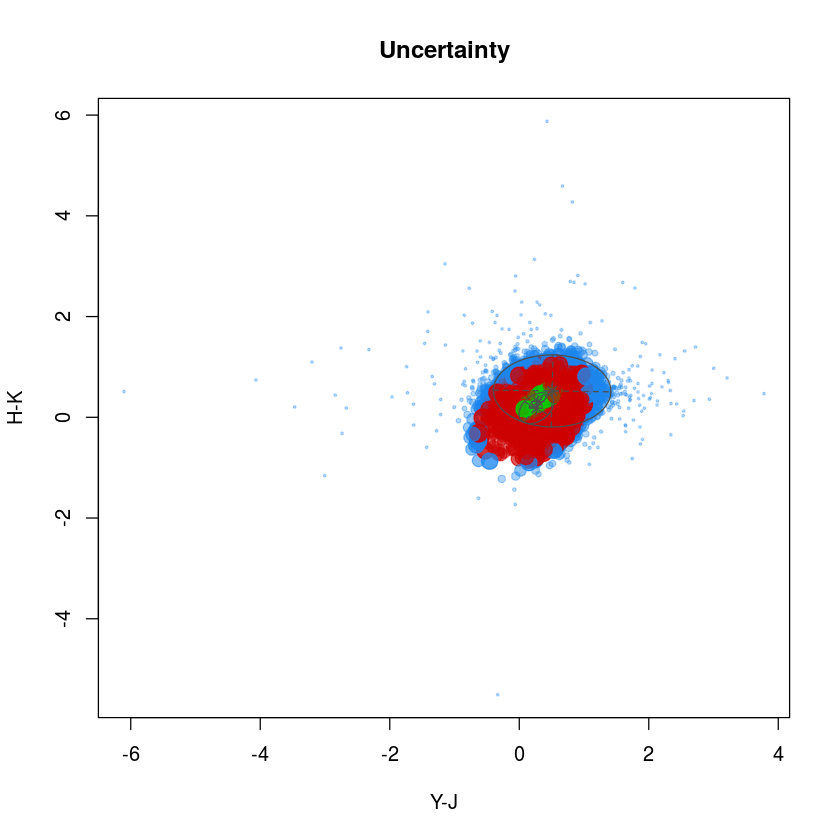

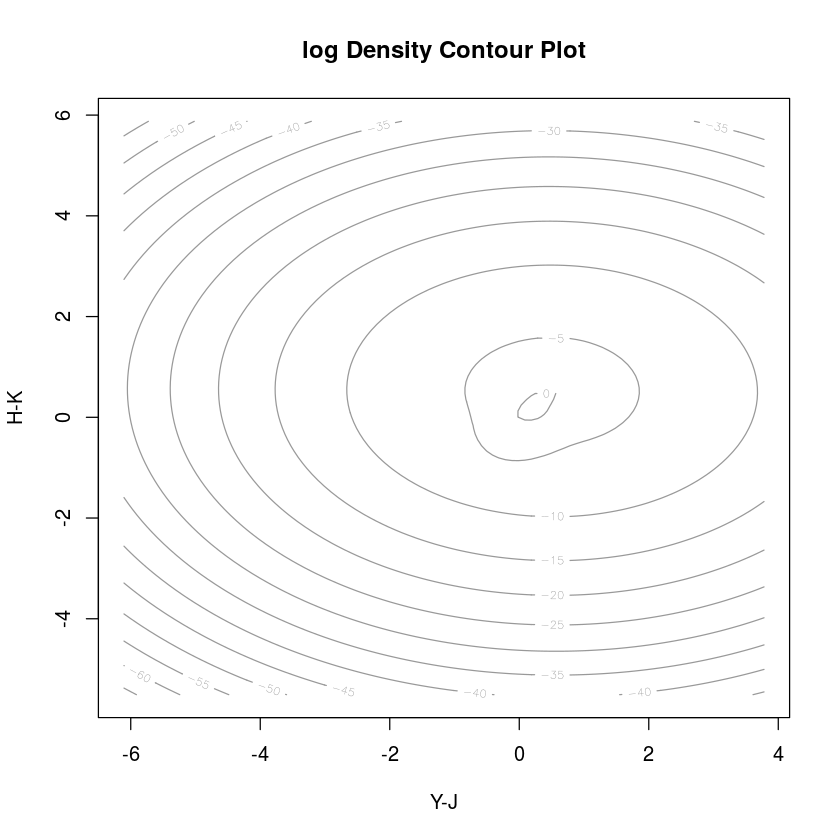

In [11]:
plot(mc)

In [24]:
ind <- sample(1:length(dat$Y), size = 10000) #Hago un sampleo random por q sino no me da la ram
aux <- dat[ind,]
aux <- subset(aux, select = c('Y-J', 'H-K', 'Y', 'J', 'H', 'K')) 
mc <- Mclust(aux, G = 2:2)

In [25]:
mc$G

[1] 2

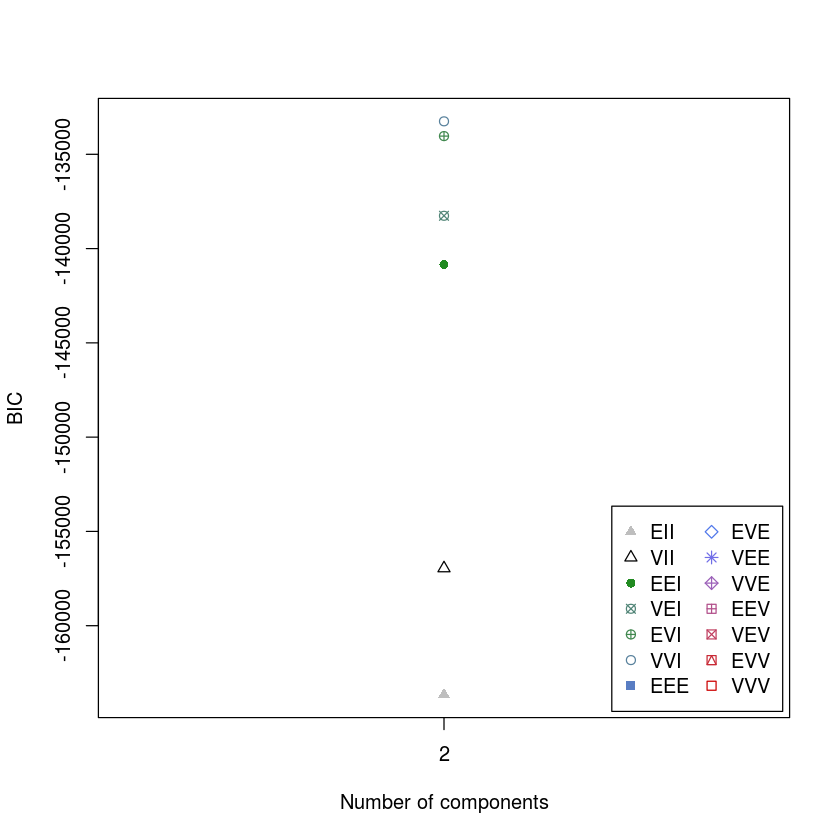

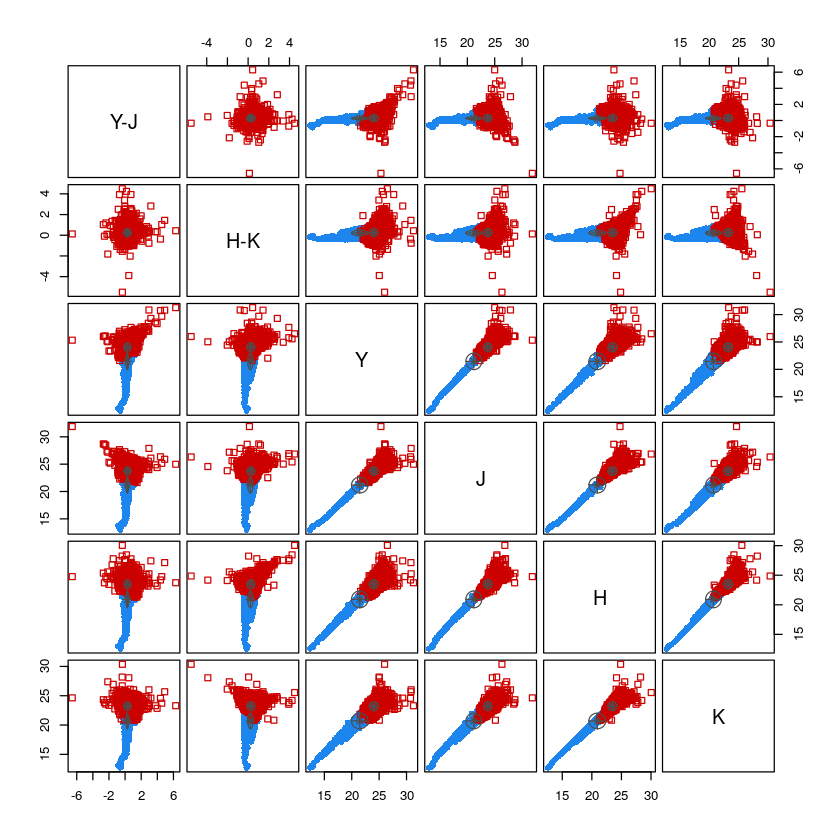

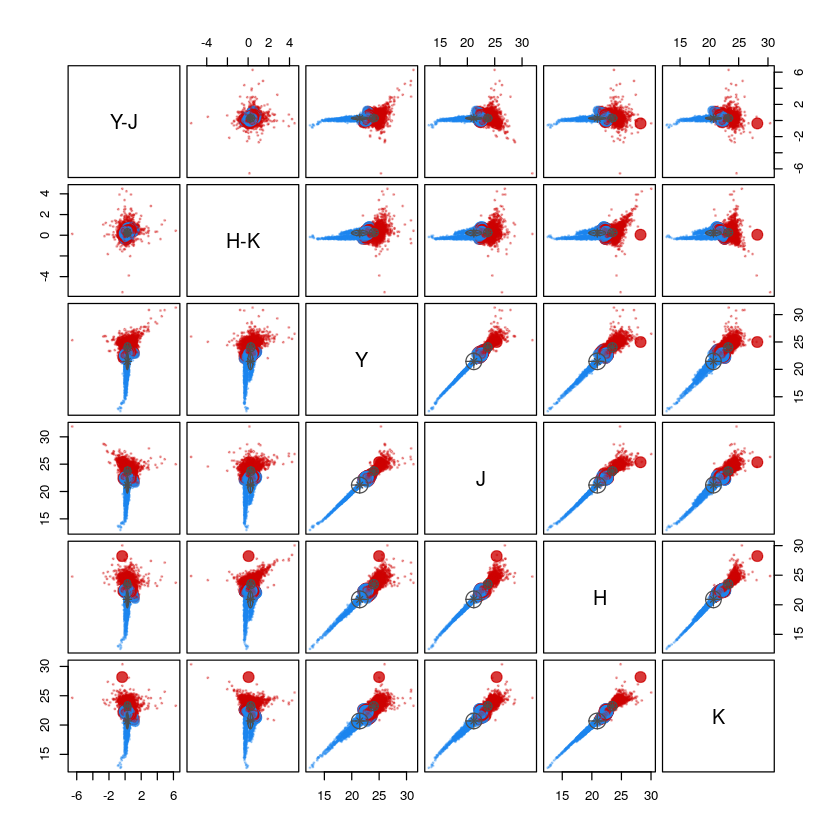

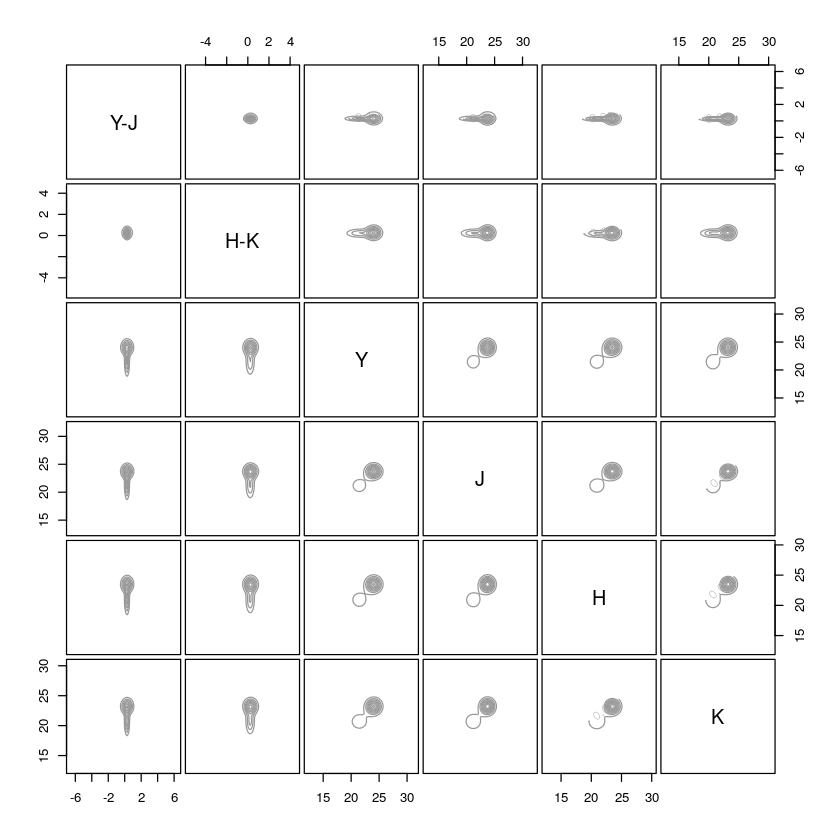

In [26]:
plot(mc)

In [39]:
ind <- sample(1:length(dat$Y), size = 5000) #Hago un sampleo random por q sino no me da la ram
aux <- dat[ind,]
aux <- subset(aux, select = c('Y-J', 'H-K')) 
aux <- subset(aux, aux$'Y-J' < 1 & aux$'Y-J' > -1 & aux$'H-K' > -1 & aux$'H-K' < 1)
hc <- hclust(dist(aux))

In [40]:
tree <- cutree(hc, k = 2)
aux <- data.frame(aux, tree)
tree1 <- subset(aux, aux$tree ==1)
tree2 <- subset(aux, aux$tree ==2)

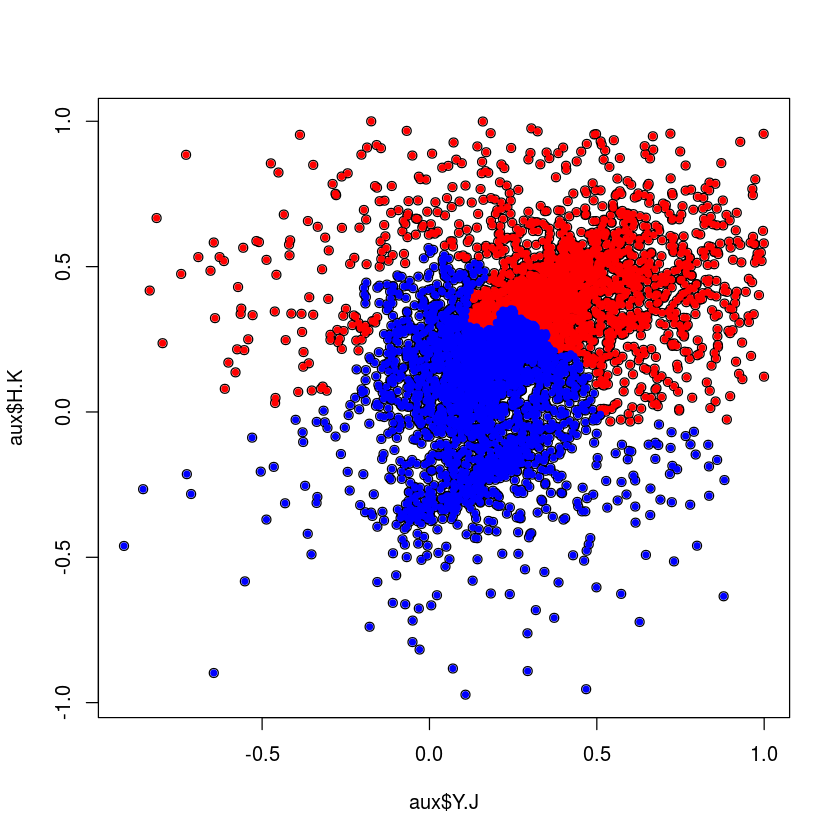

In [42]:
plot(aux$Y.J,aux$H.K)
points(tree1$Y.J,tree1$H.K,pch=20,col='red')
points(tree2$Y.J,tree2$H.K,pch=20,col='blue')

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“27 y values <= 0 omitted from logarithmic plot”

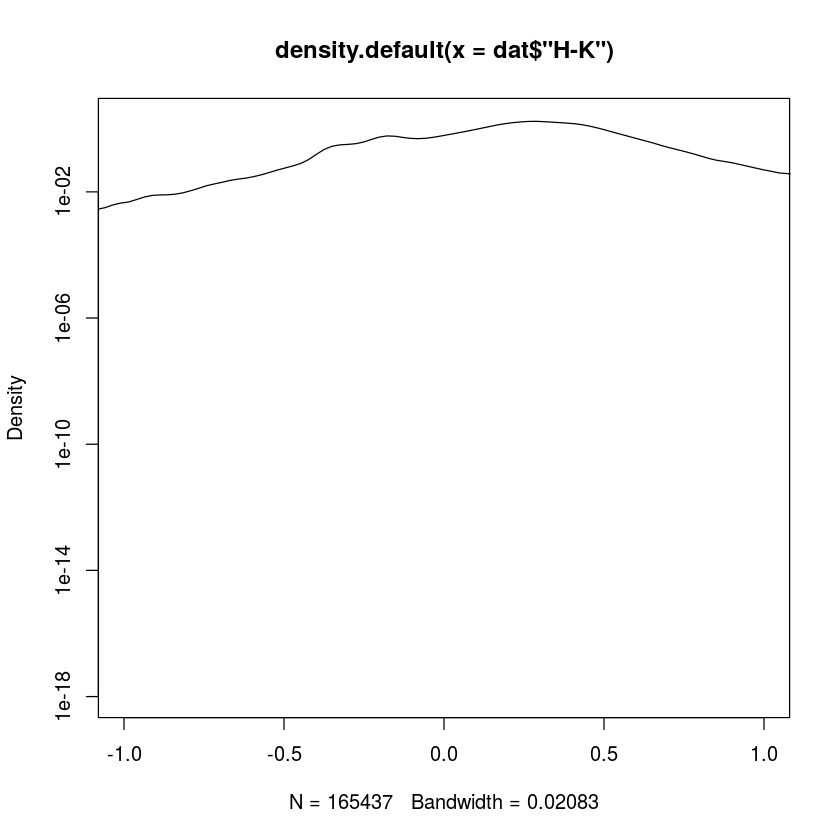

In [48]:
plot(density(dat$'H-K'), log = 'y', xlim=c(-1,1))